# BitMEX Chat Analysis
Author : Arnaud Carrere

### Imports

In [1]:
from vader.vaderSentiment import SentimentIntensityAnalyzer as SIA
import pandas as pd
pd.set_option('display.max_colwidth', -1)
import datetime
from datetime import timedelta
import inspect
analyzer = SIA()
inspect.getmodule(analyzer)
import matplotlib.pyplot as plt
import scipy.linalg
import re
import numpy as np

### Data loading

In [2]:
!ls "../Dumps"

BitMEX_EnglishChat.csv          bitmex_chat_message_history.csv
BitMEX_channels.json            bullish_tweets.csv
BitMEX_chat.csv                 combined_tweets_Jul14-24.csv
BitMEX_chat_signals.csv         crypto_tweets_8_24_18.csv
bearish_tweets.csv


In [3]:
data = pd.read_csv("../Dumps/bitmex_chat_message_history.csv")
data.info()
display(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344000 entries, 0 to 343999
Data columns (total 6 columns):
id           344000 non-null int64
date         344000 non-null object
user         343782 non-null object
message      343996 non-null object
fromBot      344000 non-null bool
channelID    343992 non-null float64
dtypes: bool(1), float64(1), int64(1), object(3)
memory usage: 13.5+ MB


,id,date,user,message,fromBot,channelID
0,1,2014-11-24T12:00:21.539Z,BitMEX_Sam,Welcome to BitMEX! We are live.,False,1.0
1,2,2014-11-24T12:20:29.073Z,BitMEX_Arthur,Hello World,False,1.0
2,3,2014-11-24T12:22:54.732Z,laisee,alive,False,1.0
3,4,2014-11-24T12:24:17.119Z,BitMEX_Arthur,welcome,False,1.0
4,5,2014-11-24T12:26:21.860Z,BitMEX_Sam,Welcome!,False,1.0
5,6,2014-11-24T12:27:04.546Z,wudaokor,"Hey Arthur, glad to see the site is up!",False,1.0
6,7,2014-11-24T12:27:25.524Z,laisee,congrats on the opening,False,1.0
7,8,2014-11-24T12:28:41.482Z,BitMEX_Arthur,thanks please deposit and try us out,False,1.0
8,9,2014-11-24T12:28:47.937Z,BitMEX_Arthur,any questions feel free to ask,False,1.0
9,10,2014-11-24T12:28:57.612Z,joequant,congrats,False,1.0


### Data engineering

In [4]:
#Useless columns and NaN
columns_to_drop = ["channelID","id"]
data.drop(columns_to_drop, axis=1, inplace=True)
data.fillna("", inplace=True)

#Date features
data["date"] = data.apply(lambda row: datetime.datetime.strptime(row["date"],"%Y-%m-%dT%H:%M:%S.%fZ"), axis=1)
data["date_cal"] = data.apply(lambda row: row["date"].date(), axis=1)

#Bot features
data["REKT"] = data.apply(lambda row: 1 if (row["user"]=="REKT") else 0, axis=1)
data["bot"] = data.apply(lambda row: 1 if row["fromBot"] else 0, axis=1)

#Text features
data["length"] = data.apply(lambda row: len(row["message"]), axis=1)
data["words"] = data.apply(lambda row: len(row["message"].split()), axis=1)
data["replyTo"] = data.apply(lambda row: re.match('(^[ a-zA-Z0-9_.-]+):',row["message"]).group(0)[:-1] if re.match('(^[ a-zA-Z0-9_.-]+):',row["message"]) else 0, axis=1)
data["newThread"] = data.apply(lambda row: 1 if (row["replyTo"] != 0) else 0, axis=1)
data["question"] = data.apply(lambda row: 1 if ("?" in row["message"]) else 0, axis=1)
data["long"] = data.apply(lambda row: 1 if ("long" in row["message"]) else 0, axis=1)
data["short"] = data.apply(lambda row: 1 if ("short" in row["message"]) else 0, axis=1)
analyzer = SIA()
data["sentiment"] = data.apply(lambda row: analyzer.polarity_scores(row["message"])["compound"], axis=1)

data.head()

,date,user,message,fromBot,date_cal,REKT,bot,length,words,replyTo,newThread,question,long,short,sentiment
0,2014-11-24 12:00:21.539,BitMEX_Sam,Welcome to BitMEX! We are live.,False,2014-11-24,0,0,31,6,0,0,0,0,0,0.5093
1,2014-11-24 12:20:29.073,BitMEX_Arthur,Hello World,False,2014-11-24,0,0,11,2,0,0,0,0,0,0.0000
2,2014-11-24 12:22:54.732,laisee,alive,False,2014-11-24,0,0,5,1,0,0,0,0,0,0.3818
3,2014-11-24 12:24:17.119,BitMEX_Arthur,welcome,False,2014-11-24,0,0,7,1,0,0,0,0,0,0.4588
4,2014-11-24 12:26:21.860,BitMEX_Sam,Welcome!,False,2014-11-24,0,0,8,1,0,0,0,0,0,0.5093


### Internal statistics

In [5]:
start = data.iloc[0]["date"]
end = data.iloc[-1]["date"]
interval = end - start
date_set = set(start.date() + timedelta(x) for x in range(interval.days))
missing_days = sorted(date_set - set(data["date_cal"]))
missing_percentage = (len(missing_days)/(interval.days+1))*100

print("Conversation started: {}".format(str(start)))
print("Conversation ended: {}".format(str(end)))
print("Conversation overall duration: {}".format(interval))
print("{:.0f} days without messages ({:.2f}% of the total days duration)".format(len(missing_days), missing_percentage))

Conversation started: 2014-11-24 12:00:21.539000
Conversation ended: 2016-12-27 09:52:50.692000
Conversation overall duration: 763 days 21:52:29.153000
17 days without messages (2.23% of the total days duration)


### Users

In [6]:
users = data["user"].unique()

print("{:.0f} users have been active on the chat\n".format(len(users)))

2093 users have been active on the chat



### Statistics by day

In [7]:
days_stats = pd.DataFrame()
data.set_index('date', inplace=True)

days_stats['length_mean'] = data.length.resample('D').mean()
days_stats['length_sum'] = data.length.resample('D').sum()
days_stats['length_var'] = data.length.resample('D').var()
days_stats['words_mean'] = data.words.resample('D').mean()
days_stats['words_sum'] = data.words.resample('D').sum()
days_stats['words_var'] = data.words.resample('D').var()
days_stats['user_count'] = data.user.resample('D').nunique()
days_stats['message_count'] = data.message.resample('D').count()
days_stats['REKT_ratio'] = data.REKT.resample('D').mean()
days_stats['bot_ratio'] = data.bot.resample('D').mean()
days_stats['newThread_ratio'] = data.newThread.resample('D').mean()
days_stats['question_ratio'] = data.question.resample('D').mean()
days_stats['long_ratio'] = data.long.resample('D').mean()
days_stats['short_ratio'] = data.short.resample('D').mean()
days_stats['sentiment_mean'] = data.sentiment.resample('D').mean()
days_stats['sentiment_var'] = data.sentiment.resample('D').var()

days_stats.fillna(days_stats.median(), inplace=True)
days_stats.head()

,length_mean,length_sum,length_var,words_mean,words_sum,words_var,user_count,message_count,REKT_ratio,bot_ratio,newThread_ratio,question_ratio,long_ratio,short_ratio,sentiment_mean,sentiment_var
date,,,,,,,,,,,,,,,,
2014-11-24,44.240310,5707,1363.996487,8.186047,1056,40.793241,20,129,0.0,0.0,0.046512,0.170543,0.000000,0.000000,0.176029,0.107996
2014-11-25,56.155556,15162,2423.507311,10.337037,2791,74.945463,15,270,0.0,0.0,0.125926,0.200000,0.014815,0.003704,0.104656,0.094324
2014-11-26,44.325000,3546,1487.791772,8.050000,644,42.326582,9,80,0.0,0.0,0.212500,0.075000,0.000000,0.000000,0.105635,0.053937
2014-11-27,50.478873,3584,1284.567404,9.281690,659,37.948089,4,71,0.0,0.0,0.028169,0.140845,0.014085,0.014085,0.089777,0.073796
2014-11-28,53.577273,11787,1228.646970,10.172727,2238,40.335326,8,220,0.0,0.0,0.081818,0.104545,0.045455,0.027273,0.079838,0.076135


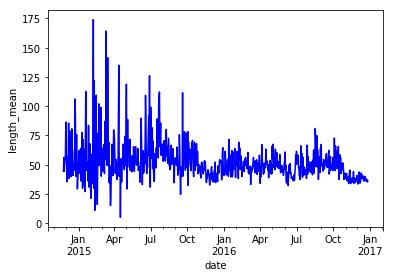

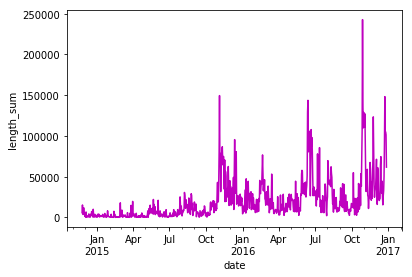

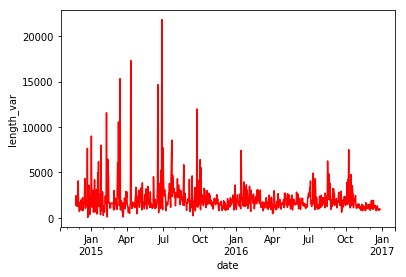

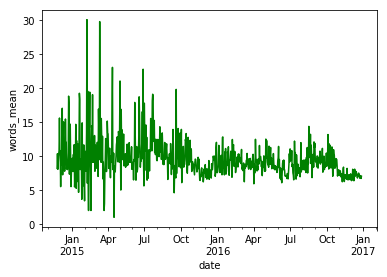

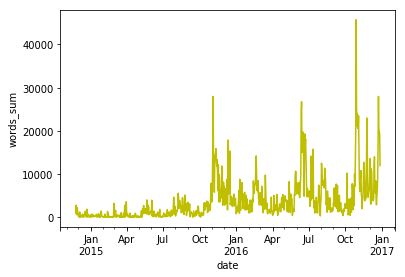

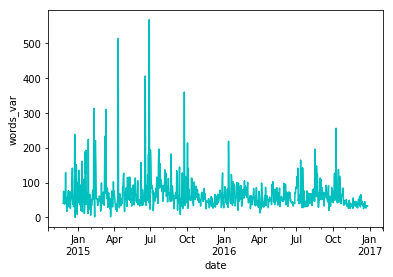

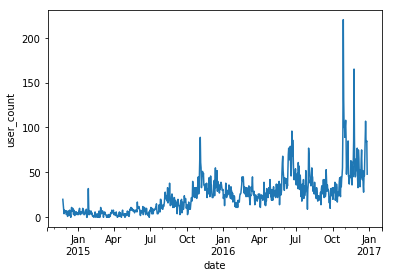

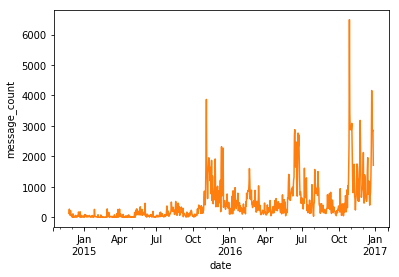

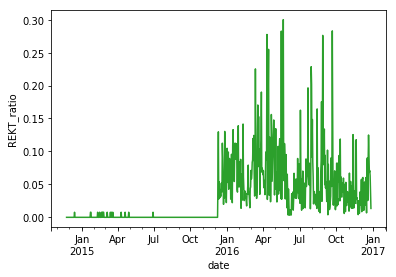

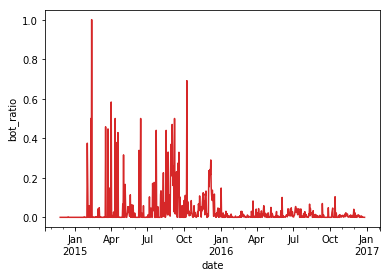

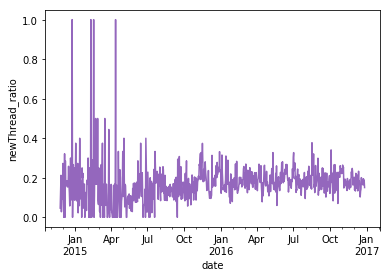

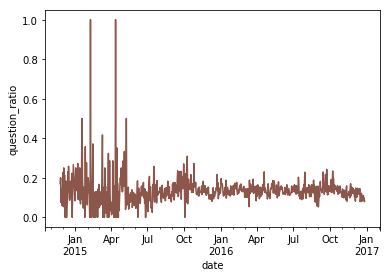

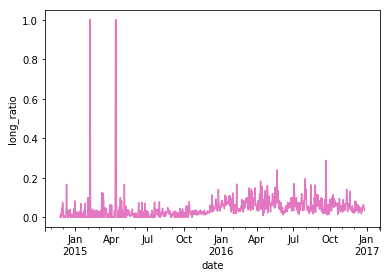

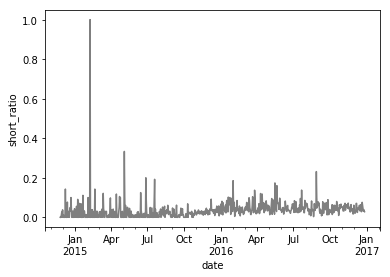

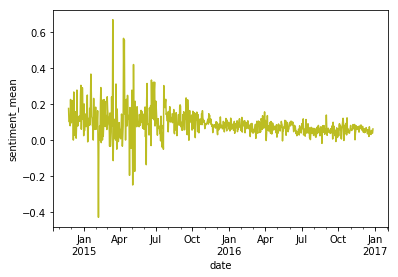

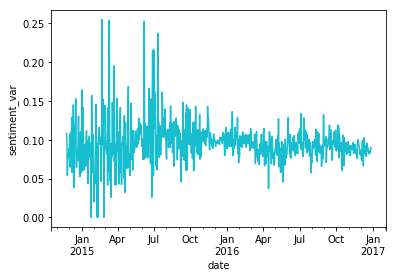

In [9]:
#Plotting normalized stats by day
def normalize(data):
    return [number/scipy.linalg.norm(data) for number in data]

colors = ['b','m','r','g','y','c','C0','C1','C2','C3','C4','C5','C6','C7','C8','C9']
i=0
for column in list(days_stats.columns.values):
    #days_stats_norm = days_stats.apply(lambda col: normalize(col), axis=0)
    plt.figure()
    plt.ylabel(column)
    days_stats[column].plot(color=colors[i])
    i += 1

### Submission

In [35]:
sub = days_stats.copy()
sub.columns = ["signal_"+str(i) for i in range(sub.shape[1])]
sub.head()

,signal_0,signal_1,signal_2,signal_3,signal_4,signal_5,signal_6,signal_7,signal_8,signal_9,signal_10,signal_11,signal_12,signal_13,signal_14,signal_15
date,,,,,,,,,,,,,,,,
2014-11-24,44.240310,5707,1363.996487,8.186047,1056,40.793241,20,129,0.0,0.0,0.046512,0.170543,0.000000,0.000000,0.176029,0.107996
2014-11-25,56.155556,15162,2423.507311,10.337037,2791,74.945463,15,270,0.0,0.0,0.125926,0.200000,0.014815,0.003704,0.104656,0.094324
2014-11-26,44.325000,3546,1487.791772,8.050000,644,42.326582,9,80,0.0,0.0,0.212500,0.075000,0.000000,0.000000,0.105635,0.053937
2014-11-27,50.478873,3584,1284.567404,9.281690,659,37.948089,4,71,0.0,0.0,0.028169,0.140845,0.014085,0.014085,0.089777,0.073796
2014-11-28,53.577273,11787,1228.646970,10.172727,2238,40.335326,8,220,0.0,0.0,0.081818,0.104545,0.045455,0.027273,0.079838,0.076135


In [42]:
for i in range(sub.shape[1]):
    sub["signal_"+str(i)].to_csv("../BitMEX_signals/signal_"+str(i)+".csv")